<a href="https://colab.research.google.com/github/manaswigaur04/maze_solver_opencv/blob/main/ME25B070_iBot_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Press 1 for maze1, 2 for maze2 and 3 for maze3: 1
84
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1

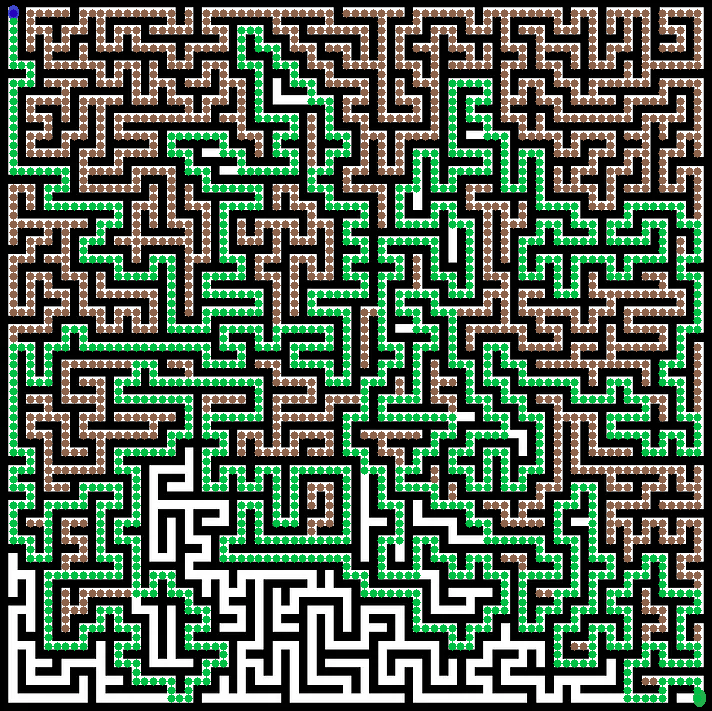

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import time
import urllib.request

try:
    maze = int(input("Press 1 for maze1, 2 for maze2 and 3 for maze3: "))
except:
    print("Invalid Input")
if maze==1:
    try:
        response = urllib.request.urlopen("https://github.com/manaswigaur04/maze_solver_opencv/blob/main/maze1.png?raw=true")
        image_data = response.read()
    except Exception as e:
        print(f"Error fetching image from URL: {e}")
        exit()
    w, h = (81,81)
elif maze==2:
    try:
        response = urllib.request.urlopen("https://github.com/manaswigaur04/maze_solver_opencv/blob/main/maze2.png?raw=true")
        image_data = response.read()
    except Exception as e:
        print(f"Error fetching image from URL: {e}")
        exit()
    w, h = (31,21)
elif maze==3:
    try:
        response = urllib.request.urlopen("https://github.com/manaswigaur04/maze_solver_opencv/blob/main/maze3.png?raw=true")
        image_data = response.read()
    except Exception as e:
        print(f"Error fetching image from URL: {e}")
        exit()
    w, h = (51,51)

np_array = np.asarray(bytearray(image_data), dtype=np.uint8)
input = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
resized_image = cv2.resize(input, (w, h), interpolation=cv2.INTER_LINEAR)

gray_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

starting_point = ()
ending_point = ()
grid = []
grid.append([0]*w)
for i in range(1,h-1):
    arr = [0]
    for j in range(1,w-1):
        if gray_img[i][j] <20:
            arr.append(0)
        elif gray_img[i][j] < 94:
            arr.append(3)
            print(gray_img[i][j])
            ending_point = (i, j)
        elif gray_img[i][j] < 230:
            arr.append(2)
            starting_point = (i, j)
        elif gray_img[i][j] > 200:
            arr.append(1)
    arr.append(0)
    grid.append(arr)
grid.append([0]*w)
for i in grid:
    print(i)
print("Starting Point: ", starting_point)
print("Ending Point: ", ending_point)

minimum = 10000000
minimuum_coords = ()
last_path_choices = [starting_point]
pointer = starting_point
points_explored = [starting_point]
last_pointer = ()

path = [starting_point]
while pointer != ending_point:
    neighbors = []

    if grid[pointer[0]+1][pointer[1]]!=0:
        neighbors.append((pointer[0]+1, pointer[1]))
    if grid[pointer[0]-1][pointer[1]]!=0:
        neighbors.append((pointer[0]-1, pointer[1]))
    if grid[pointer[0]][pointer[1]+1]!=0:
        neighbors.append((pointer[0], pointer[1]+1))
    if grid[pointer[0]][pointer[1]-1]!=0:
        neighbors.append((pointer[0], pointer[1]-1))
    h_score = [abs(ending_point[0]-n[0]) + abs(ending_point[1]-n[1]) for n in neighbors]
    min_index = h_score.index(min(h_score))

    if minimum > h_score[min_index]:
        minimum = h_score[min_index]
        minimuum_coords = neighbors[min_index]


    combined_arrays = zip(h_score, neighbors)
    sorted_combined = sorted(combined_arrays)
    h_score, neighbors = zip(*sorted_combined)
    if len(neighbors)>2:
        last_path_choices.append(pointer)
    for n in neighbors:
        if n not in points_explored:
            pointer = n
            points_explored.append(pointer)
            path.append(pointer)
            # print("Broke Here")
            break
    if pointer == last_pointer:
        for i in last_path_choices[::-1]:
            if i != pointer:
                pointer = i
                last_path_choices = last_path_choices[:last_path_choices.index(i)]
                break
        # pointer = last_path_choices[-1]
        #
        path = path[:path.index(pointer)+1]
    else:
        last_pointer = pointer



    temp_img = input.copy()
    radius = int(0.5*temp_img.shape[1]/w)
    for i in points_explored:
        cv2.circle(temp_img, (int(i[1]*temp_img.shape[0]/h + 0.5*temp_img.shape[0]/h), int(i[0]*temp_img.shape[1]/w + 0.5*temp_img.shape[1]/w)), radius, (75, 99, 141), -1)
    for i in path:
        cv2.circle(temp_img, (int(i[1]*temp_img.shape[0]/h + 0.5*temp_img.shape[0]/h), int(i[0]*temp_img.shape[1]/w + 0.5*temp_img.shape[1]/w)), radius, (68, 191, 2), -1)
    # time.sleep(0.5)
    cv2.circle(temp_img, (int(pointer[1]*temp_img.shape[0]/h + 0.5*temp_img.shape[0]/h), int(pointer[0]*temp_img.shape[1]/w + 0.5*temp_img.shape[1]/w)), radius, (191, 2, 37), -1)
    # cv2.imwrite('output_q5.jpg', temp_img)

    # For a live solving feed uncomment the following code.
    # cv2.imshow('Video Playback', temp_img)
    # Wait for a key press (e.g., 'q' to quit)
    # if cv2.waitKey(25) & 0xFF == ord('q'):
    #     break
print(path)
cv2_imshow(temp_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
